# Covid-19 Basic Analysis

Let's analyze the evolution of the number of deaths caused by Covid-19 in Spain.

The [dataset](https://cnecovid.isciii.es/covid19/#documentaci%C3%B3n-y-datos) used is obtained from the declaration of Covid-19 cases to the spanish National Epidemiological Surveillance Network (RENAVE) through the platform SiViES, managed by the National Epidemiology Center (CNE).

The dataset "**casos_hosp_uci_def_sexo_edad_provres.csv**" has the following features:
- provincia_iso (ISO code of the province)
- sexo (gender)
- grupo_edad (age group)
- fecha (date)
- num_casos (number of infected with confirmation test)
- num_hosp (hospitalizations)
- num_uci (admitted to ICU)
- num_def (deaths)

## Table of contents

1. <a href="#1.-Data-preparation">Data preparation</a>
2. <a href="#2.-Inspection-and-analysis">Inspection and analysis</a>

## 1. Data preparation

**Versions used:** python 3.9.5 / pandas 1.3.4 / matplotlib 3.5.0

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("datasets/dataset1/casos_hosp_uci_def_sexo_edad_provres.csv")
data

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
1160695,ZA,NC,50-59,2021-12-30,0,0,0,0
1160696,ZA,NC,60-69,2021-12-30,0,0,0,0
1160697,ZA,NC,70-79,2021-12-30,0,0,0,0
1160698,ZA,NC,80+,2021-12-30,0,0,0,0


In [13]:
print ("We have data from " + str(data.fecha[data.index.min()]) + " up to " + str(data.fecha[data.index.max()]))

We have data from 2020-01-01 up to 2021-12-30


In [14]:
data.describe()

,num_casos,num_hosp,num_uci,num_def
count,1.160700e+06,1.160700e+06,1.160700e+06,1.160700e+06
mean,5.421774e+00,3.763186e-01,3.765831e-02,7.702421e-02
std,2.670641e+01,2.538172e+00,3.147888e-01,8.216311e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.433000e+03,2.690000e+02,3.500000e+01,1.000000e+02


The dataset has data from each region each day. Let's consolidate into a single daily total.

In [15]:
cases = data.groupby('fecha').sum()
cases

,num_casos,num_hosp,num_uci,num_def
fecha,,,,
2020-01-01,0,8,0,0
2020-01-02,0,68,1,0
2020-01-03,0,11,1,0
2020-01-04,0,11,0,0
2020-01-05,0,11,0,0
...,...,...,...,...
2021-12-26,45352,534,38,41
2021-12-27,98624,663,45,56
2021-12-28,102556,568,50,41


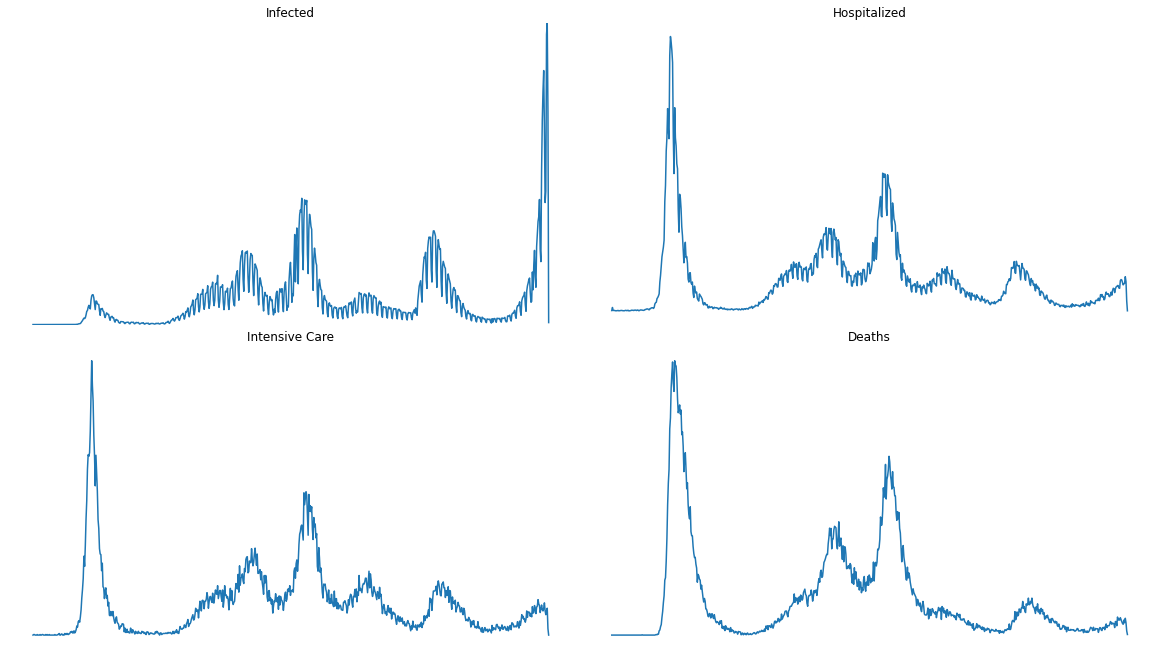

In [16]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 9))
axs[0, 0].plot(cases.num_casos)
axs[0, 0].set_title('Infected')
axs[0, 1].plot(cases.num_hosp)
axs[0, 1].set_title('Hospitalized')
axs[1, 0].plot(cases.num_uci)
axs[1, 0].set_title('Intensive Care')
axs[1, 1].plot(cases.num_def)
axs[1, 1].set_title('Deaths')

axs[0, 0].set(ylim = (0,cases.num_casos.max()))

for ax in axs.flat:
   ax.axis('off')

There's a lot of reporting noise, so let's ccalculate the 14 day average of these features.

In [17]:
cases["avg_num_casos"] = cases.iloc[:,0].rolling(window=14).mean()
cases["avg_num_hosp"] = cases.iloc[:,1].rolling(window=14).mean()
cases["avg_num_uci"] = cases.iloc[:,2].rolling(window=14).mean()
cases["avg_num_def"] = cases.iloc[:,3].rolling(window=14).mean()

In [18]:
# save dataset
cases.to_csv( "cases.csv" )

## 2. Inspection and analysis

**Versions used:** python 3.9.5 / numpy 1.21.2 / pandas 1.3.4 / matplotlib 3.5.0

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# load dataset
cases = pd.read_csv( "cases.csv", index_col ="fecha")

Let's look at the averaged features.

<AxesSubplot:xlabel='fecha'>

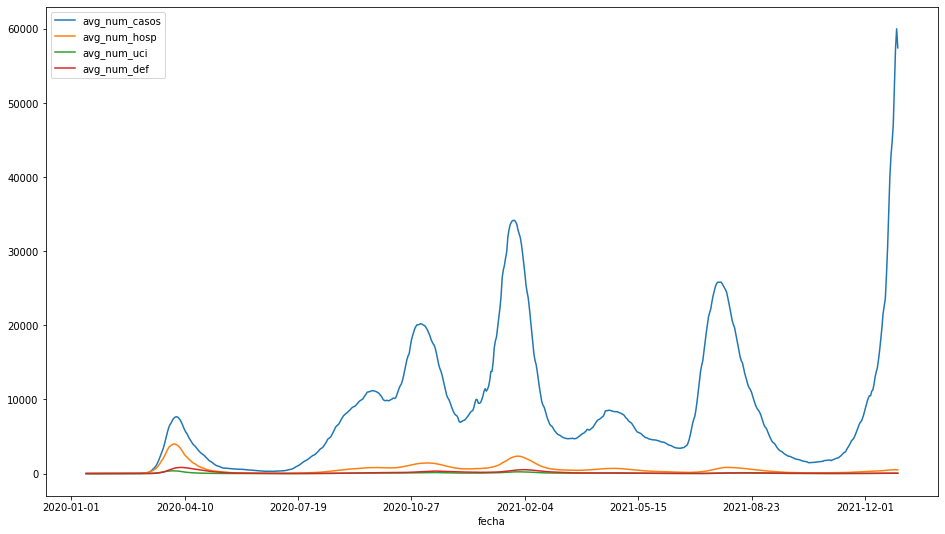

In [21]:
cases.iloc[:,4:8].plot(figsize=(16, 9))

These features are at different scales, so let's look at them separatelly.

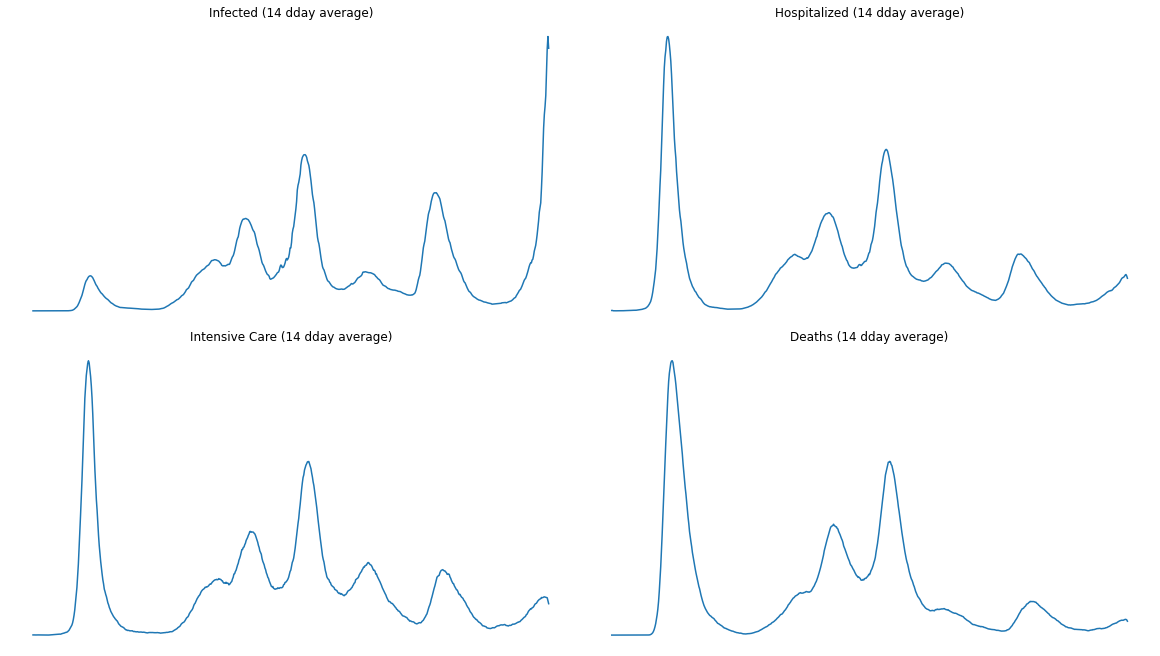

In [22]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 9))
axs[0, 0].plot(cases.avg_num_casos)
axs[0, 0].set_title('Infected (14 dday average)')
axs[0, 1].plot(cases.avg_num_hosp)
axs[0, 1].set_title('Hospitalized (14 dday average)')
axs[1, 0].plot(cases.avg_num_uci)
axs[1, 0].set_title('Intensive Care (14 dday average)')
axs[1, 1].plot(cases.avg_num_def)
axs[1, 1].set_title('Deaths (14 dday average)')

for ax in axs.flat:
   ax.axis('off')

Let's overlay infected and deaths (using different scales) to look how they evolve in relation to one another.

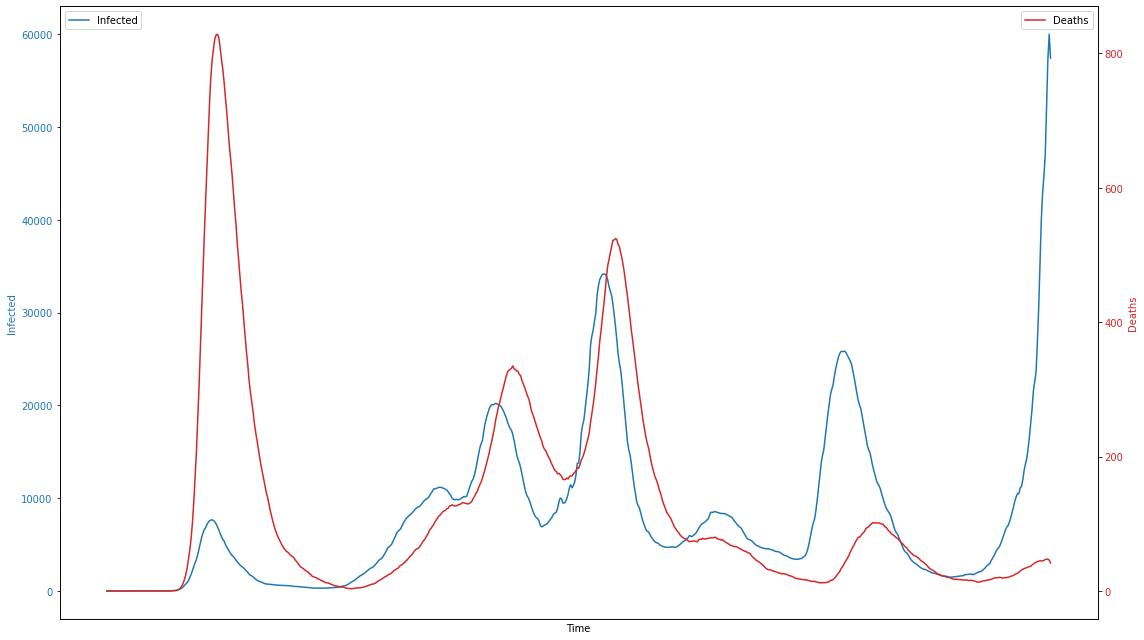

In [23]:
fig, ax1 = plt.subplots(figsize=(16, 9))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Infected', color=color)
ax1.plot(cases.index, cases.avg_num_casos, color=color, label='Infected')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Deaths', color=color)
ax2.plot(cases.index, cases.avg_num_def, color=color, label='Deaths')
ax2.tick_params(axis='y', labelcolor=color)

ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

ax1.legend(loc='upper left')
ax2.legend()

fig.tight_layout()
plt.show()

We can see that:
- The peaks of deaths happen **after** the peaks in infections
- The ratio deaths/infections of corresponding peaks change in each wave.

Let's calculate the ratio of deaths per (confirmed) infected at the corresponding peaks.

For this we'll need to determine the peak value in each of the first five waves.

We'll start with the infected.

In [24]:
end_wave = [13, 180, 345, 435, 535, 650] # aproximate positions when Covid-19 wave ended, eyeballed
height_wave = int(cases.avg_num_casos.max() * 0.9) # height where labels will be places

Let's determine the exact position of the wave ends.

In [25]:
for i in range(1,6):
    end_wave[i] = cases.index.get_loc(cases.iloc[end_wave[i]-10:end_wave[i]+10].avg_num_casos.idxmin())
end_wave

[13, 177, 343, 438, 537, 651]

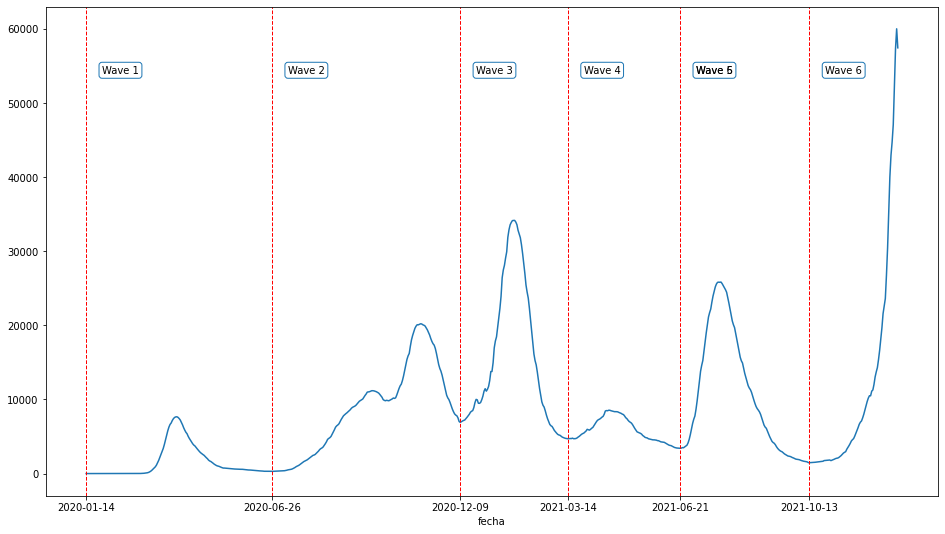

In [26]:
cases.avg_num_casos.plot(figsize=(16, 9))
bbox = dict(boxstyle="round", ec="tab:blue", fc="white", alpha=1)

for i in range(0,6):
    label = "Wave {}".format(i+1)
    plt.annotate(label, (end_wave[i] + 14,height_wave),bbox=bbox)
    plt.axvline(x=end_wave[i],linewidth=1, color='r', linestyle='--') # end of i_th wave

plt.annotate("Wave 6", (end_wave[4] + 14,height_wave)) # ongoing wave at the time of coding

plt.xticks(end_wave, cases.iloc[end_wave].index);

In [27]:
wave_max = [cases.avg_num_casos[:end_wave[1]].max(),             # max wave 1
            cases.avg_num_casos[end_wave[1]:end_wave[2]].max(),  # max wave 2
            cases.avg_num_casos[end_wave[2]:end_wave[3]].max(),  # ...
            cases.avg_num_casos[end_wave[3]:end_wave[4]].max(),
            cases.avg_num_casos[end_wave[4]:end_wave[5]].max()]
wave_max

[7663.857142857143,
 20204.071428571428,
 34157.142857142855,
 8545.642857142857,
 25837.214285714286]

Now let's do the same for the deaths

In [28]:
end_wave_def = [13,200, 360, 455, 555, 650]
height_wave = int(cases.avg_num_def.max() * 0.9) # height where labels will be places
for i in range(1,6):
    end_wave_def[i] = cases.index.get_loc(cases.iloc[end_wave_def[i]-10:end_wave_def[i]+10].avg_num_def.idxmin())
height_wave_def = 800
end_wave_def

[13, 199, 360, 461, 554, 656]

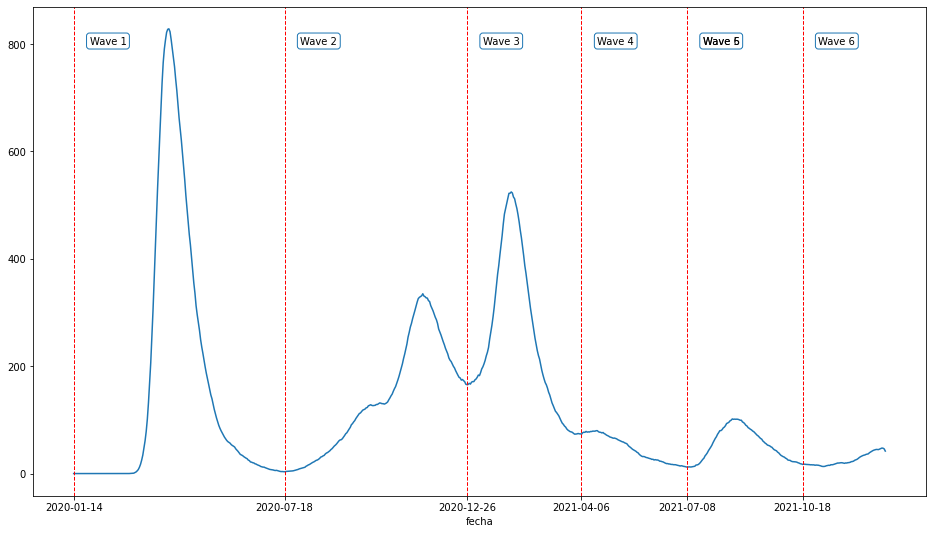

In [29]:
cases.avg_num_def.plot(figsize=(16, 9))

bbox = dict(boxstyle="round", ec="tab:blue", fc="white", alpha=1)

for i in range(0,6):
    label = "Wave {}".format(i+1)
    plt.annotate(label, (end_wave_def[i] + 14,height_wave_def),bbox=bbox)
    plt.axvline(x=end_wave_def[i],linewidth=1, color='r', linestyle='--') # end of i_th wave

plt.annotate("Wave 6", (end_wave_def[4] + 14,height_wave_def)) # ongoing wave at the time of coding

plt.xticks(end_wave_def, cases.iloc[end_wave_def].index);

In [30]:
wave_def_max = [cases.avg_num_def[:end_wave_def[1]].max(), # max wave 1
                cases.avg_num_def[end_wave_def[1]:end_wave_def[2]].max(),
                cases.avg_num_def[end_wave_def[2]:end_wave_def[3]].max(),
                cases.avg_num_def[end_wave_def[3]:end_wave_def[4]].max(),
                cases.avg_num_def[end_wave_def[4]:end_wave_def[5]].max()]
wave_def_max

[828.3571428571429,
 334.85714285714283,
 524.5,
 79.85714285714286,
 101.71428571428572]

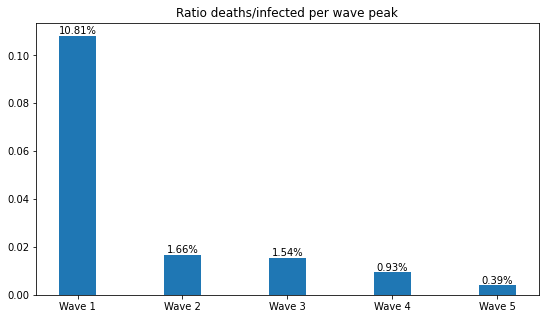

In [31]:
res = pd.Series([i / j for i, j in zip(wave_def_max, wave_max)])
res.index = cases.index[end_wave_def[1:6]]

labels = [f"{round(i*100,2)}%" for i in res] # Bar labels.

fig, ax = plt.subplots(figsize=(9, 5))

p1 = ax.bar(res.index, res, 0.35)

ax.set_title("Ratio deaths/infected per wave peak")

x_labels =[] # x tick labels
for i in range(0,5):
    x_labels = np.append(x_labels, "Wave {}".format(i+1))

ax.set_xticks(np.arange(5), labels=x_labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, labels=labels, label_type='edge')

plt.show()

The ratio deaths/infected in the first wave was likely distorted by lack of testing.

The ratio at the peaks of the subsequent waves has been improving, most likely due to:
- patient treatment improvements.
- vaccination rolled out in Spain, starting from the middle of the fourth wave.
- different characteristics of dominating virus variants at each wave